**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier, KDTree, DistanceMetric

from sklearn.metrics.pairwise import pairwise_distances

import scipy as sp

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric = 'euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm   = algorithm
        self.metric      = metric
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        if (self.algorithm == 'kd_tree'):
            self.kdtree = KDTree (self.X_train)
        return self 
    
    def predict(self, X):
        if(self.algorithm == 'brute'):
            dst = pairwise_distances (X, self.X_train, metric = self.metric)
            k_smallest_indices = np.argpartition(dst, self.n_neighbors-1)[:, :self.n_neighbors]

        if(self.algorithm == 'kd_tree'):
            k_smallest_indices = self.kdtree.query (X, k=self.n_neighbors)[1]

        labels = self.y_train[k_smallest_indices]
        y_pred = sp.stats.mode (labels, axis = 1)[0]

        return y_pred.reshape (-1)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

MyKNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=2)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 922 µs, sys: 0 ns, total: 922 µs
Wall time: 849 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 11.9 µs


MyKNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=2)

In [10]:
%time clf.predict(X_test)

CPU times: user 4.4 ms, sys: 0 ns, total: 4.4 ms
Wall time: 6.36 ms


array([0, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 3.44 ms, sys: 0 ns, total: 3.44 ms
Wall time: 5.86 ms


array([0, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 1.49 ms, sys: 0 ns, total: 1.49 ms
Wall time: 1.15 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 161 µs, sys: 0 ns, total: 161 µs
Wall time: 156 µs


MyKNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=2)

In [16]:
%time clf.predict(X_test)

CPU times: user 5.3 ms, sys: 0 ns, total: 5.3 ms
Wall time: 9.61 ms


array([2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 3.13 ms, total: 3.13 ms
Wall time: 2.23 ms


array([2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_df = 0.1)
v_data = vect.fit_transform (data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
from sklearn import model_selection
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
kf.split (v_data)

<generator object _BaseKFold.split at 0x7fa342b256d0>

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [23]:
def find_k(data, target, metrc):
    kf = KFold(n_splits=3)
#     t = kf.split (data)
    score = np.arange(10, dtype = float)
    for j in range(1,11):
        tmp = 0;
        for train,test in kf.split(data):
            my_clf = MyKNeighborsClassifier(n_neighbors=j, algorithm='brute', metric=metrc)
            my_clf.fit(data [train], target [train])
            my_clf_pred = my_clf.predict(data [test])
            tmp += accuracy_score(my_clf_pred, target [test])
            
        score[j-1] = tmp/3
        
    k = score.argmax() + 1
    return (k, score)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

1. Сравнение двух метрик, поиск наилучшего k для каждой

In [24]:
k1, y1 = find_k(v_data, target, 'euclidean')
print("best k euclidean = ", k1)
print("best score euclidean =", y1[k1-1])

k2, y2 = find_k(v_data, target, 'cosine')
print("best k cosine    = ", k2)
print("best score cosine =", y2[k2-1])

best k euclidean =  1
best score euclidean = 0.26294757136634356
best k cosine    =  10
best score cosine = 0.5798125056066374


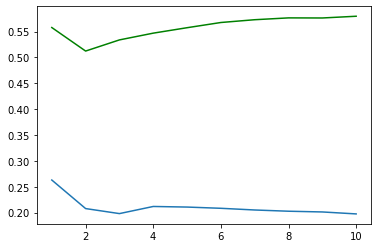

In [25]:
fig = plt.figure()
x = np.arange(10, dtype = int)+1
ax1 = plt.plot(x, y1)
ax2 = plt.plot(x, y2, color = 'g')

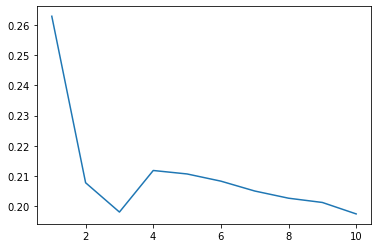

In [26]:
fig2 = plt.figure()
ax1 = plt.plot(x, y1)

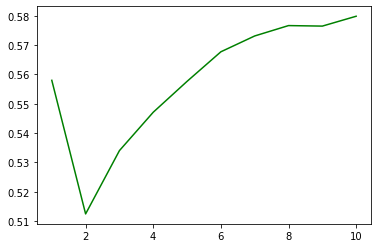

In [27]:
fig3 = plt.figure()
ax2 = plt.plot(x, y2, color = 'g')

В итоге получилось, что результат с косинусной метрикой лучше

2. Посмотрим Tfldf векторизацию

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tvectorizer = TfidfVectorizer(max_df = 0.1)
v_dataT = Tvectorizer.fit_transform (data)

In [29]:
figT = plt.figure()
k1T, y1T = find_k(v_dataT, target, 'euclidean')
print("best k euclidean = ", k1T)
print("best score euclidean =", y1T[k1T-1])

k2T, y2T = find_k(v_dataT, target, 'cosine')
print("best k cosine = ", k2T)
print("best score cosine =", y2T[k2T-1])

best k euclidean =  1
best score euclidean = 0.13452344495427937
best k cosine =  10
best score cosine = 0.6668732861968031


<Figure size 432x288 with 0 Axes>

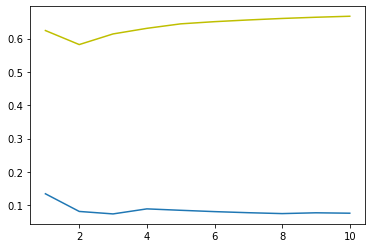

In [30]:
ax1T = plt.plot(x, y1T)
ax2T = plt.plot(x, y2T, color = 'y')

Результаты с разными векторизациями почти не отличаются. На Tfldf результаты с cosine метрикой лучше, а с евклидовой хуже, при любых k. 

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [31]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [37]:
data_tst = newsgroups['data']
target_tst = newsgroups['target']

Tvectorizer = TfidfVectorizer(max_df = 0.1)
v_dataT = Tvectorizer.fit_transform (data)
v_dataT2 = Tvectorizer.transform (data_tst)

my_clf = MyKNeighborsClassifier(n_neighbors=10, algorithm='brute', metric = 'cosine')
my_clf.fit(v_dataT, target)
my_clf_pred = my_clf.predict(v_dataT2)
tmp = accuracy_score(my_clf_pred, target_tst)
print('score = ', tmp)

score =  0.6063462559745088


Результат тестовой выборки оказался хуже кросс-валидации. Может из-за того, что  на кросс-валидации резьтат получается усредненным.